**Proyecto de Reconocimiento de Imágenes**

Alumna: Carina Giovine

Tecnicatura en Ciencia de Datos e Inteligencia Artificial - Cohorte 2020

En el presente trabajo se va a entrenar una res neuronal para clasificar imagenes en dos categóricas: Lentes de lectura / Lentes de sol.



CNN: **redes neuronales convolucionales**, son modelos de programación que permiten principalmente el reconocimiento de imágenes atribuyendo automáticamente a cada imagen proporcionada en la entrada, una etiqueta correspondiente a la clase a la que pertenece.

La convolución es una operación matemática que se suele utilizar para el tratamiento y el reconocimiento de imágenes. 

In [ ]:
#importamos las librerías
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#montamos el drive para luego acceder a la carpeta con las imágenes
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


La carpeta de entreamiento (train) cuenta con 200 imágenes en total, 100 están agrupadas en un carpeta con el nombre 'lentes de lectura' y otra carpeta con 100 imágenes con el nombre 'lentes de sol'.

In [ ]:
# se convierte la imagen a formato  a px con valor entre 0 y 255 
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_ds = train_ds.flow_from_directory('/content/drive/MyDrive/data_train', target_size=(64, 64), 
                                        batch_size=32, class_mode='binary')   # establezco el tamaño de la imagene en 64x64

Found 200 images belonging to 2 classes.


Para test tenemos 39 imágenes en total divididas en dos carpetas, 20 imagenes en la carpeta 'lentes de lectura' y 19 imagenes en la carpeta 'lentes de sol'.

In [ ]:
test_ds = ImageDataGenerator(rescale = 1./255)
test_ds = test_ds.flow_from_directory('/content/drive/MyDrive/data_test', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 39 images belonging to 2 classes.


En la siguiente sección, se crea una primer capa de neuronas  “Convolucional de 2 Dimensiones” **Conv2D()** , donde entrarán nuestras imágenes de 64x64x3.

Aplico 32 filtros (kernel) de tamaño 3×3.

Utilizo La función **ReLU** como activación de las neuronas.

Hago un **MaxPooling** (de 2×2) que reduce la imagen que entra de 64×64 a la mitad,(32×32) manteniendo las características “únicas” que detectó cada kernel.




In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

“Aplanamos” **Flatten()**  los 32 filtros y creamos una capa de 128 neuronas “tradicionales” **Dense()**.



In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

La *optimización* es un proceso importante que optimiza los *pesos* de entrada al comparar la predicción y la función de pérdida.

En cuanto al optimizador, utilcé  **Adam**.  Adam es un algoritmo de optimización que se puede utilizar para actualizar iterativamente los pesos de la red en función de los datos de entrenamiento.

Utilice la precisión **accuracy** como métrica.

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

con **model.fit()**  se  entrena al modelo.

**epochs** : número de veces que se necesita evaluar el modelo durante el entrenamiento. En este caso 25

In [ ]:
model.fit(x=train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
7/7 [==============================] - 176s 23s/step - loss: 0.7626 - accuracy: 0.5150 - val_loss: 0.6027 - val_accuracy: 0.8205
Epoch 2/25
7/7 [==============================] - 1s 96ms/step - loss: 0.5785 - accuracy: 0.8050 - val_loss: 0.5379 - val_accuracy: 0.7692
Epoch 3/25
7/7 [==============================] - 1s 100ms/step - loss: 0.4462 - accuracy: 0.8250 - val_loss: 0.5073 - val_accuracy: 0.8462
Epoch 4/25
7/7 [==============================] - 1s 96ms/step - loss: 0.3829 - accuracy: 0.8100 - val_loss: 0.4646 - val_accuracy: 0.7949
Epoch 5/25
7/7 [==============================] - 1s 109ms/step - loss: 0.3856 - accuracy: 0.8150 - val_loss: 0.4221 - val_accuracy: 0.7949
Epoch 6/25
7/7 [==============================] - 1s 98ms/step - loss: 0.3135 - accuracy: 0.8550 - val_loss: 0.4032 - val_accuracy: 0.7692
Epoch 7/25
7/7 [==============================] - 1s 100ms/step - loss: 0.2683 - accuracy: 0.8650 - val_loss: 0.4494 - val_accuracy: 0.8974
Epoch 8/25
7/7 [=======



---


Luego de entrenar nuestro modelo, cargamos imágenes y evaluamos el modelo para ver como se desempeña.

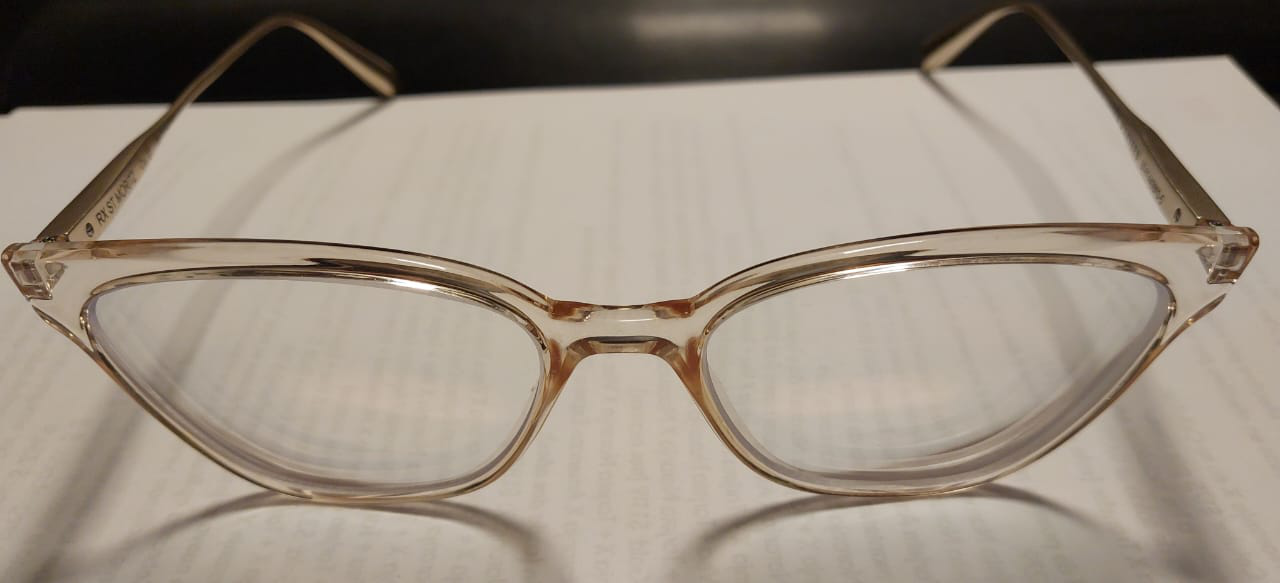

In [ ]:
image.load_img('/content/drive/MyDrive/image.jpeg')

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/image.jpeg', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'lentes de sol'
else:
    pred = 'lentes de lectura'

In [ ]:
print(pred)

clentes de lectura


En este caso la predicción fue correcta.

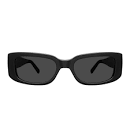

In [ ]:
image.load_img('/content/drive/MyDrive/images1.png')

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/images1.png', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'lentes de sol'
else:
    pred = 'lentes de lectura'

In [ ]:
print(pred)

lentes de sol


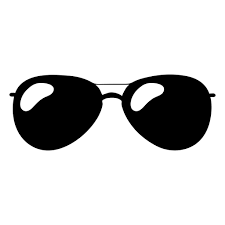

In [ ]:
image.load_img('/content/drive/MyDrive/image4.png')

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/image4.png', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'lentes de sol'
else:
    pred = 'lentes de lectura'

In [ ]:
print(pred)

lentes de sol


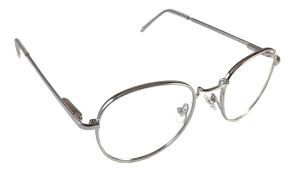

In [ ]:
image.load_img('/content/drive/MyDrive/image3.jpg')

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/image3.jpg', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'lentes de sol'
else:
    pred = 'lentes de lectura'

In [ ]:
print(pred)

lentes de lectura


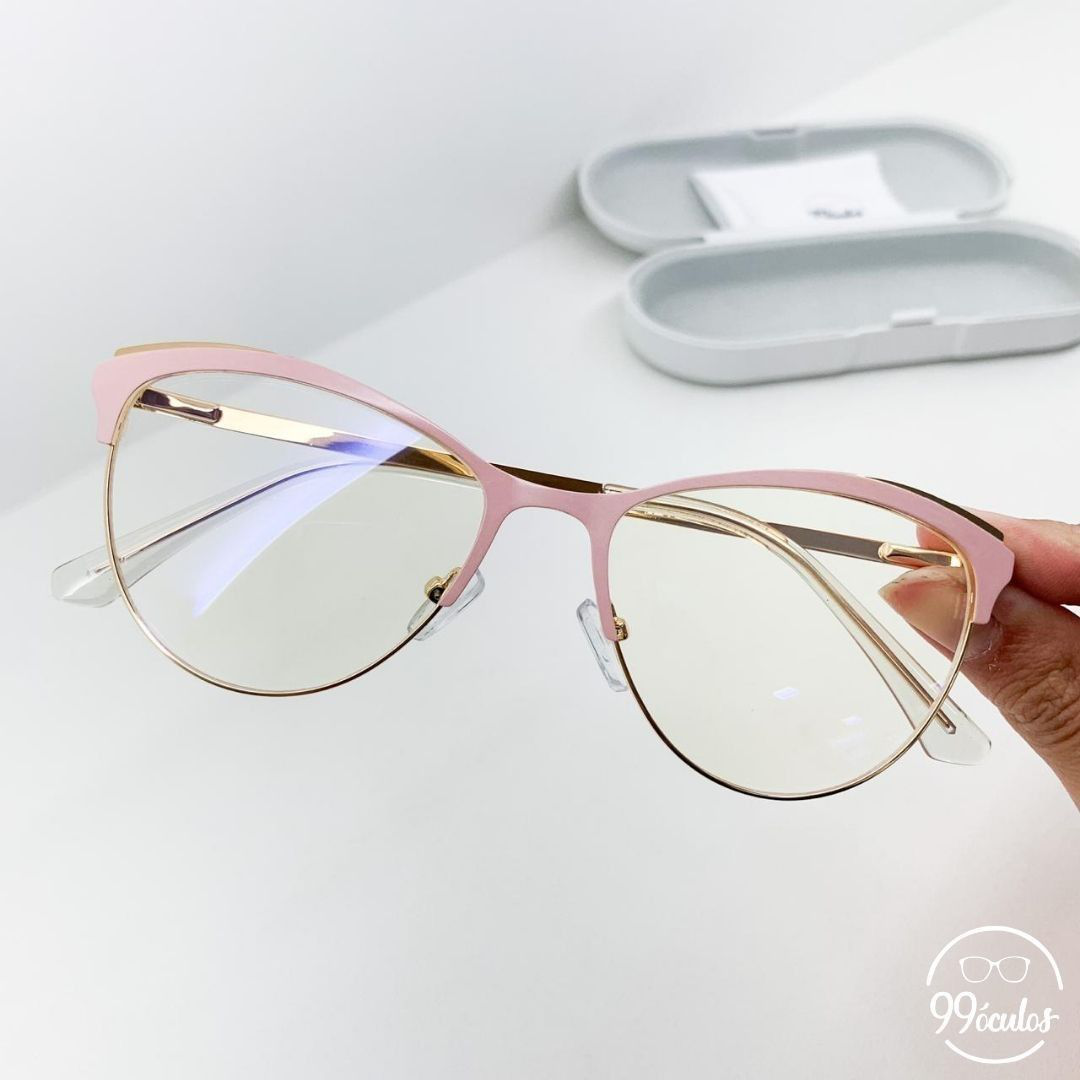

In [ ]:
image.load_img('/content/drive/MyDrive/image2.jpg')

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/image2.jpg', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'lentes de sol'
else:
    pred = 'lentes de lectura'

In [ ]:
print(pred)

lentes de lectura


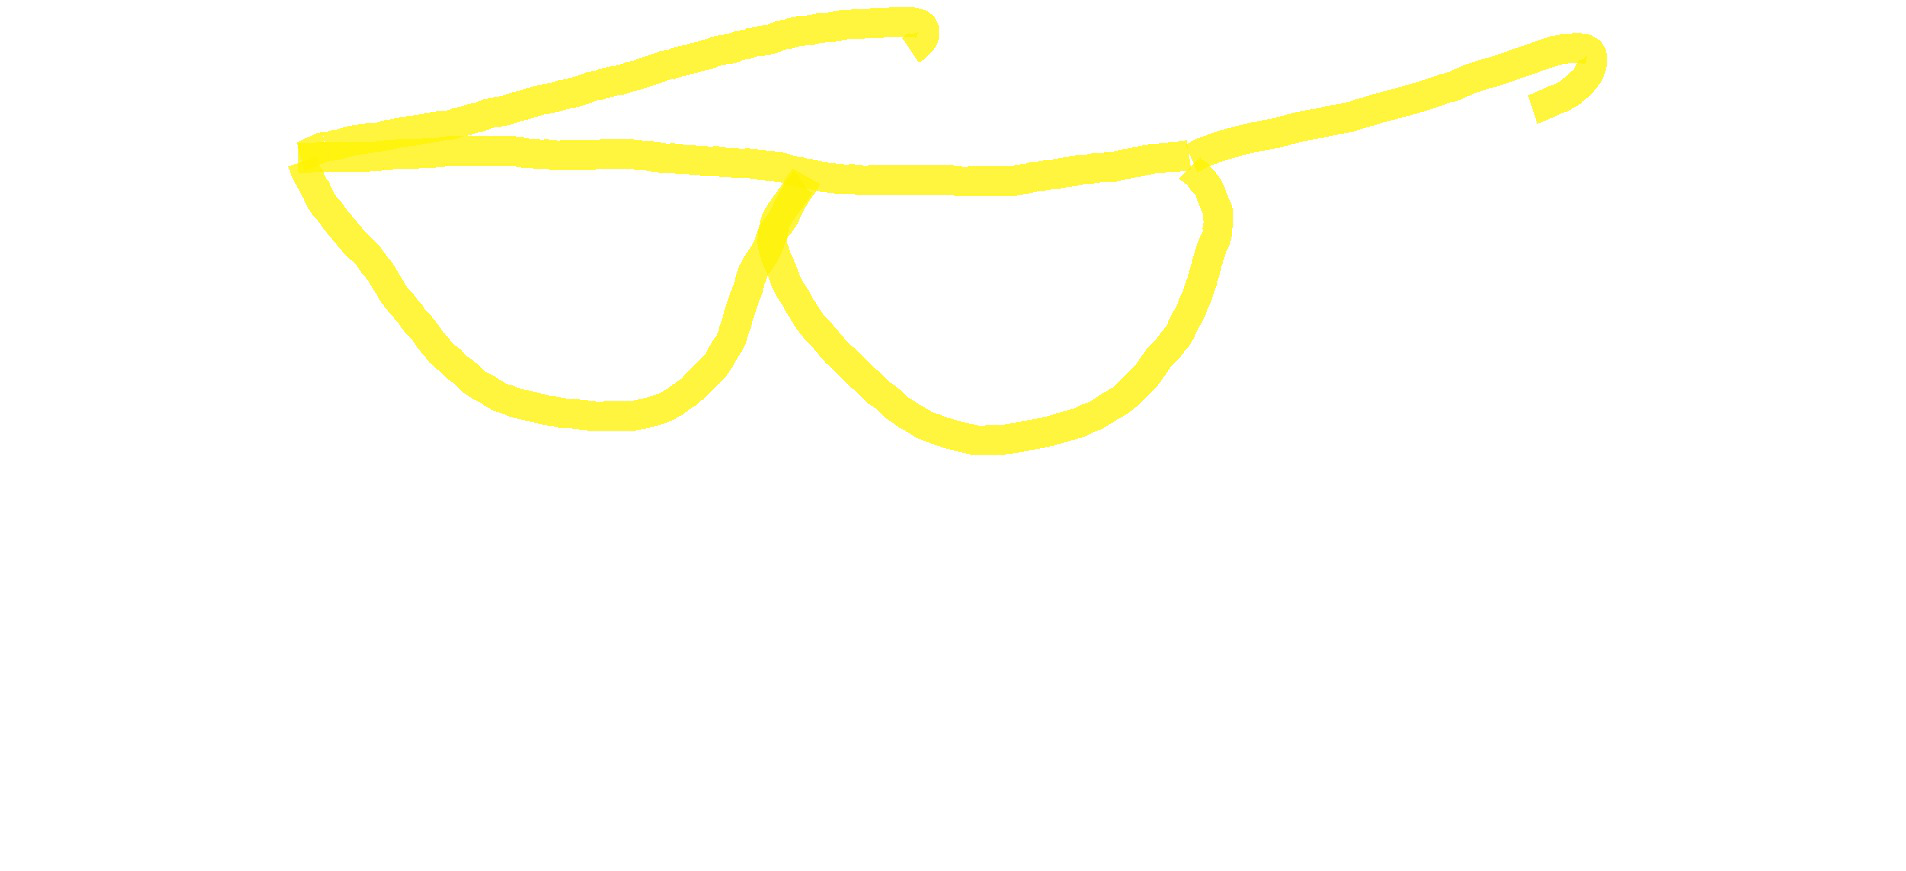

In [ ]:
image.load_img('/content/drive/MyDrive/image5.jpg')

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/image5.jpg', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'lentes de sol'
else:
    pred = 'lentes de lectura'

In [ ]:
print(pred)

lentes de lectura


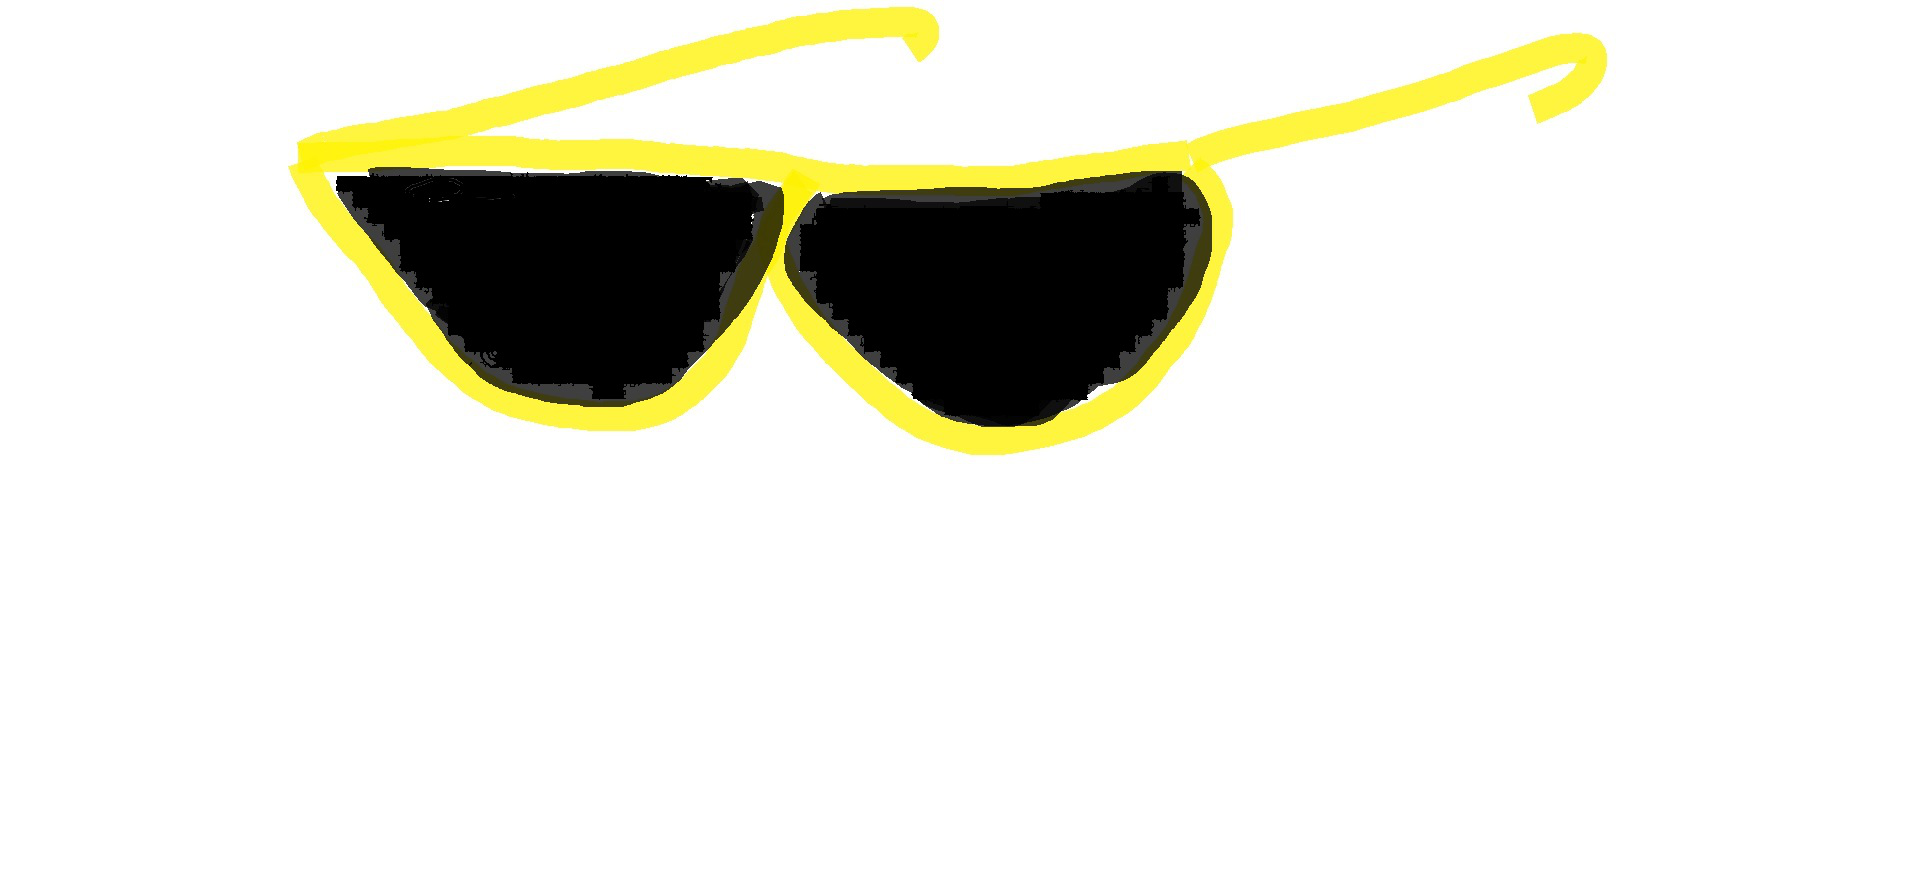

In [ ]:
image.load_img('/content/drive/MyDrive/image6.jpg')

In [ ]:
test_img = image.load_img('/content/drive/MyDrive/image6.jpg', target_size = (64, 64))
img = image.img_to_array(test_img)
img = np.expand_dims(img, axis = 0)
r = model.predict(img)
train_ds.class_indices
if r[0][0] == 1:
    pred = 'lentes de sol'
else:
    pred = 'lentes de lectura'

In [ ]:
print(pred)

lentes de sol


En todos los casos que evaluamos nuestro modelo fue correcto el desempeño del mismo. Tanto con imágenes como con dibujos que representan las clases que tenemos: 'lentes de lectura' y 'lentes de sol'